# Análise explorátorio das estações do INMET

## Objetivo

Objetivo: Realizar uma análise exploratório das estações referentes as **normais climatológicas do Brasil (1991-2020)** do INMET disponível no link abaixo:

[https://portal.inmet.gov.br/normais](https://portal.inmet.gov.br/normais)

O arquivo a ser utilizado é o:

[https://portal.inmet.gov.br/uploads/normais/Normal-Climatologica-ESTA%C3%87%C3%95ES.xlsx](https://portal.inmet.gov.br/uploads/normais/Normal-Climatologica-ESTA%C3%87%C3%95ES.xlsx)

# Importação das bibliotecas

In [29]:
import pandas as pd
import numpy as np

# Leitura do arquivo

Leitura do arquivo pulando as duas primeiras linhas que não são importantes.

In [176]:
df = pd.read_excel('../dados/texto/Normal-Climatologica-ESTAÇÕES.xlsx', skiprows = range(0, 2))

/tmp/ipykernel_2652/659326820.py:1: FutureWarning:

Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])



Visualização do DataFrame.

In [177]:
df

,Nº,Código,Nome da Estação,UF,Latitude,Longitude,Atitude,Inicio Operação,Fim Operação,Situação
0,1,82989,AGUA BRANCA,AL,-9.264722,-37.938056,603.42,1928-05-05,NaT,Operante
1,2,83249,ALAGOINHAS,BA,-12.148611,-38.425278,129.78,1931-01-01,2021-07-15,Fechada
2,3,82353,ALTAMIRA,PA,-3.214167,-52.213056,101.51,1927-04-24,2021-07-25,Fechada
3,4,83007,ALTO DA BOA VISTA,RJ,-22.965833,-43.279167,347.10,1966-06-01,NaT,Operante
4,5,82970,ALTO PARNAIBA,MA,-9.108333,-45.948611,285.05,1976-08-21,2021-07-25,Fechada
...,...,...,...,...,...,...,...,...,...,...
266,267,83642,VICOSA,MG,-20.762500,-42.863889,697.53,1919-10-01,2018-03-08,Fechada
267,268,83648,VITORIA,ES,-20.315833,-40.316944,36.20,1923-11-20,NaT,Operante
268,269,83344,VITORIA DA CONQUISTA,BA,-14.886389,-40.801389,879.47,1936-01-01,NaT,Operante
269,270,83623,VOTUPORANGA,SP,-20.439722,-49.983611,510.41,1976-07-05,NaT,Operante


Visualização do nome das colunas.

In [178]:
df.columns

Index(['Nº', 'Código', 'Nome da Estação', 'UF', 'Latitude', 'Longitude',
       'Atitude', 'Inicio Operação', 'Fim Operação', 'Situação'],
      dtype='object')

# Análise 1

## Processamento do DataFrame

Remove colunas desnecessárioas e cria um novo DataFrame com o nome de `new_df`.

In [179]:
new_df = df.drop(['Nº', 'Código', 'Nome da Estação', 'Latitude', 'Longitude', 'Atitude', 'Inicio Operação', 'Fim Operação', 'Situação'], axis=1)

Visualização das novas colunas do DataFrame.

In [180]:
new_df['Total'] = new_df

Agrupa pela coluna UF para saber o total de estações em cada estado brasileiro.

In [181]:
estacao_uf = new_df.groupby('UF').agg(np.size)
estacao_uf

,Total
UF,
AC,3
AL,5
AM,14
AP,1
BA,27
CE,11
DF,2
ES,6
GO,10


Visualiza o total de estaçãoes por cada estado brasileiro em ordem crescente.

In [182]:
estacao_uf.sort_values(by='Total', ascending=True, inplace=True)

## Geração do gráfico de barras do DataFrame

In [183]:
import cufflinks as cf
from IPython.display import display, HTML

#making all charts public and setting a global theme
cf.set_config_file(sharing='public', theme='white', offline=True)

In [184]:
estacao_uf.iplot(kind="bar", y="Total",
                yTitle="Estado", xTitle="Total de estações", title="Total de estações em cada estado brasileiro - Normal Climatológica (1991-2020)",
                colors=["tomato"], bargap=0.5,
                sortbars=True,
                dimensions=(1000, 700),
                orientation="h")

# Análise 2

Seleciona as colunas de interesse.

In [185]:
df1 = df[['UF', 'Situação']]

Visualiza as colunas do novo DataFrame.

In [186]:
df1

,UF,Situação
0,AL,Operante
1,BA,Fechada
2,PA,Fechada
3,RJ,Operante
4,MA,Fechada
...,...,...
266,MG,Fechada
267,ES,Operante
268,BA,Operante
269,SP,Operante


In [187]:
agrupado = df1.groupby('Situação').agg(np.size)
agrupado

,UF
Situação,
Desativada,40
Fechada,52
Operante,179


In [188]:
porcentagem = ((agrupado / np.sum(agrupado))*100).round(0)
porcentagem

,UF
Situação,
Desativada,15.0
Fechada,19.0
Operante,66.0


In [189]:
porcentagem.reset_index().iplot(kind="pie",
                             labels='Situação',
                             values='UF',
                             textinfo='percent+label',
                             pull=[0, 0, 0.1],
                             )

# Análise 3

## Objetivo

O objetivo consiste em utilizar os pontos de latitude e longitude do DataFrame do arquivo `xlsx` para desenhar no mapa.

## Instalação de bibliotecas

In [229]:
#!pip install geopandas
#!pip install mapclassify

## Importação das bibliotecas

In [238]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

## Seleção de colunas específicas do DataFrame

In [239]:
df2 = df[['Nº', 'Latitude', 'Longitude', 'Situação']]

In [240]:
df2

,Nº,Latitude,Longitude,Situação
0,1,-9.264722,-37.938056,Operante
1,2,-12.148611,-38.425278,Fechada
2,3,-3.214167,-52.213056,Fechada
3,4,-22.965833,-43.279167,Operante
4,5,-9.108333,-45.948611,Fechada
...,...,...,...,...
266,267,-20.762500,-42.863889,Fechada
267,268,-20.315833,-40.316944,Operante
268,269,-14.886389,-40.801389,Operante
269,270,-20.439722,-49.983611,Operante


In [241]:
gdf = gpd.GeoDataFrame(df2, geometry=gpd.points_from_xy(df2.Longitude, df2.Latitude))

In [242]:
gdf

,Nº,Latitude,Longitude,Situação,geometry
0,1,-9.264722,-37.938056,Operante,POINT (-37.93806 -9.26472)
1,2,-12.148611,-38.425278,Fechada,POINT (-38.42528 -12.14861)
2,3,-3.214167,-52.213056,Fechada,POINT (-52.21306 -3.21417)
3,4,-22.965833,-43.279167,Operante,POINT (-43.27917 -22.96583)
4,5,-9.108333,-45.948611,Fechada,POINT (-45.94861 -9.10833)
...,...,...,...,...,...
266,267,-20.762500,-42.863889,Fechada,POINT (-42.86389 -20.76250)
267,268,-20.315833,-40.316944,Operante,POINT (-40.31694 -20.31583)
268,269,-14.886389,-40.801389,Operante,POINT (-40.80139 -14.88639)
269,270,-20.439722,-49.983611,Operante,POINT (-49.98361 -20.43972)


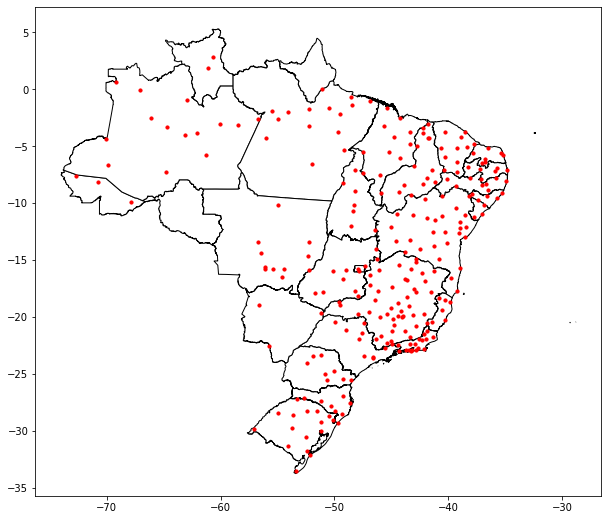

In [282]:
world = gpd.read_file('../dados/shapefile/Brasil_estados/BRUFE250GC_SIR.shp')

ax = world.plot(color='white', figsize=(12,9), edgecolor='black')

gdf.plot(ax=ax, color='red', markersize=10)

plt.show()

Altera a coluna `Situação` para valor numérico: 0 (Desativada), 1 (Fechada) e 2 (Operante).

In [270]:
gdf['Categoria'] = gdf.groupby('Situação').ngroup()

In [271]:
gdf.head(10)

,Nº,Latitude,Longitude,Situação,geometry,Categoria
0,1,-9.264722,-37.938056,Operante,POINT (-37.93806 -9.26472),2
1,2,-12.148611,-38.425278,Fechada,POINT (-38.42528 -12.14861),1
2,3,-3.214167,-52.213056,Fechada,POINT (-52.21306 -3.21417),1
3,4,-22.965833,-43.279167,Operante,POINT (-43.27917 -22.96583),2
4,5,-9.108333,-45.948611,Fechada,POINT (-45.94861 -9.10833),1
5,6,-23.015833,-44.329722,Desativada,POINT (-44.32972 -23.01583),0
6,7,-5.626667,-37.815000,Operante,POINT (-37.81500 -5.62667),2
7,8,-10.952500,-37.054444,Fechada,POINT (-37.05444 -10.95250),1
8,9,-16.848889,-42.060833,Operante,POINT (-42.06083 -16.84889),2
9,10,-15.902500,-52.245278,Operante,POINT (-52.24528 -15.90250),2


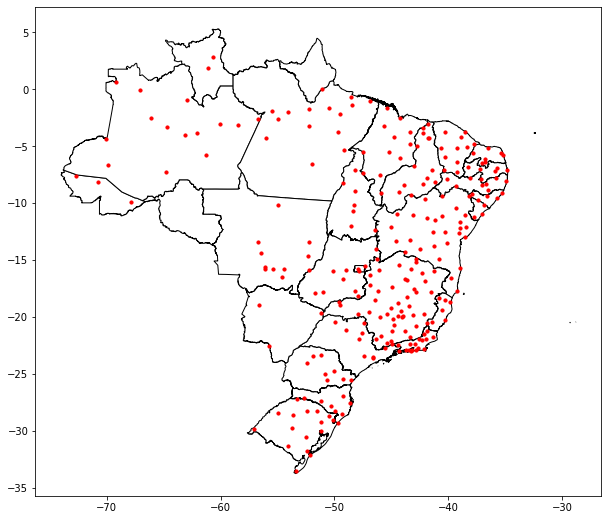

In [281]:
world = gpd.read_file('../dados/shapefile/Brasil_estados/BRUFE250GC_SIR.shp')

ax = world.plot(figsize=(12,9), color='white', edgecolor='black')

gdf.plot(ax=ax, color='red', markersize=10)

plt.show()